<a href="https://colab.research.google.com/github/Sohammhatre10/HeartDiseaseDetection/blob/main/HeartDiseaseIdentifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [86]:
df = pd.read_csv("Heart_Disease_Prediction.csv")
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [87]:
df['Heart Disease'] = df['Heart Disease'].map({"Presence": 1, "Absence": 0})

In [88]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [89]:
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
correlation_matrix = df.corr()
target_column = 'Heart Disease'
selected_rows = correlation_matrix[target_column][correlation_matrix[target_column] > 0].index.tolist()
selected_rows

dfheart = pd.DataFrame()
for i in selected_rows:
  dfheart[i] = df[i]
dfheart

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,2,0,2.4,2,3,3,1
1,67,0,3,115,564,2,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,0.3,1,0,7,1
3,64,1,4,128,263,0,1,0.2,2,1,7,0
4,74,0,2,120,269,2,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,0,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,0.0,1,0,7,0
267,56,0,2,140,294,2,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,0.4,2,0,6,0


<Axes: >

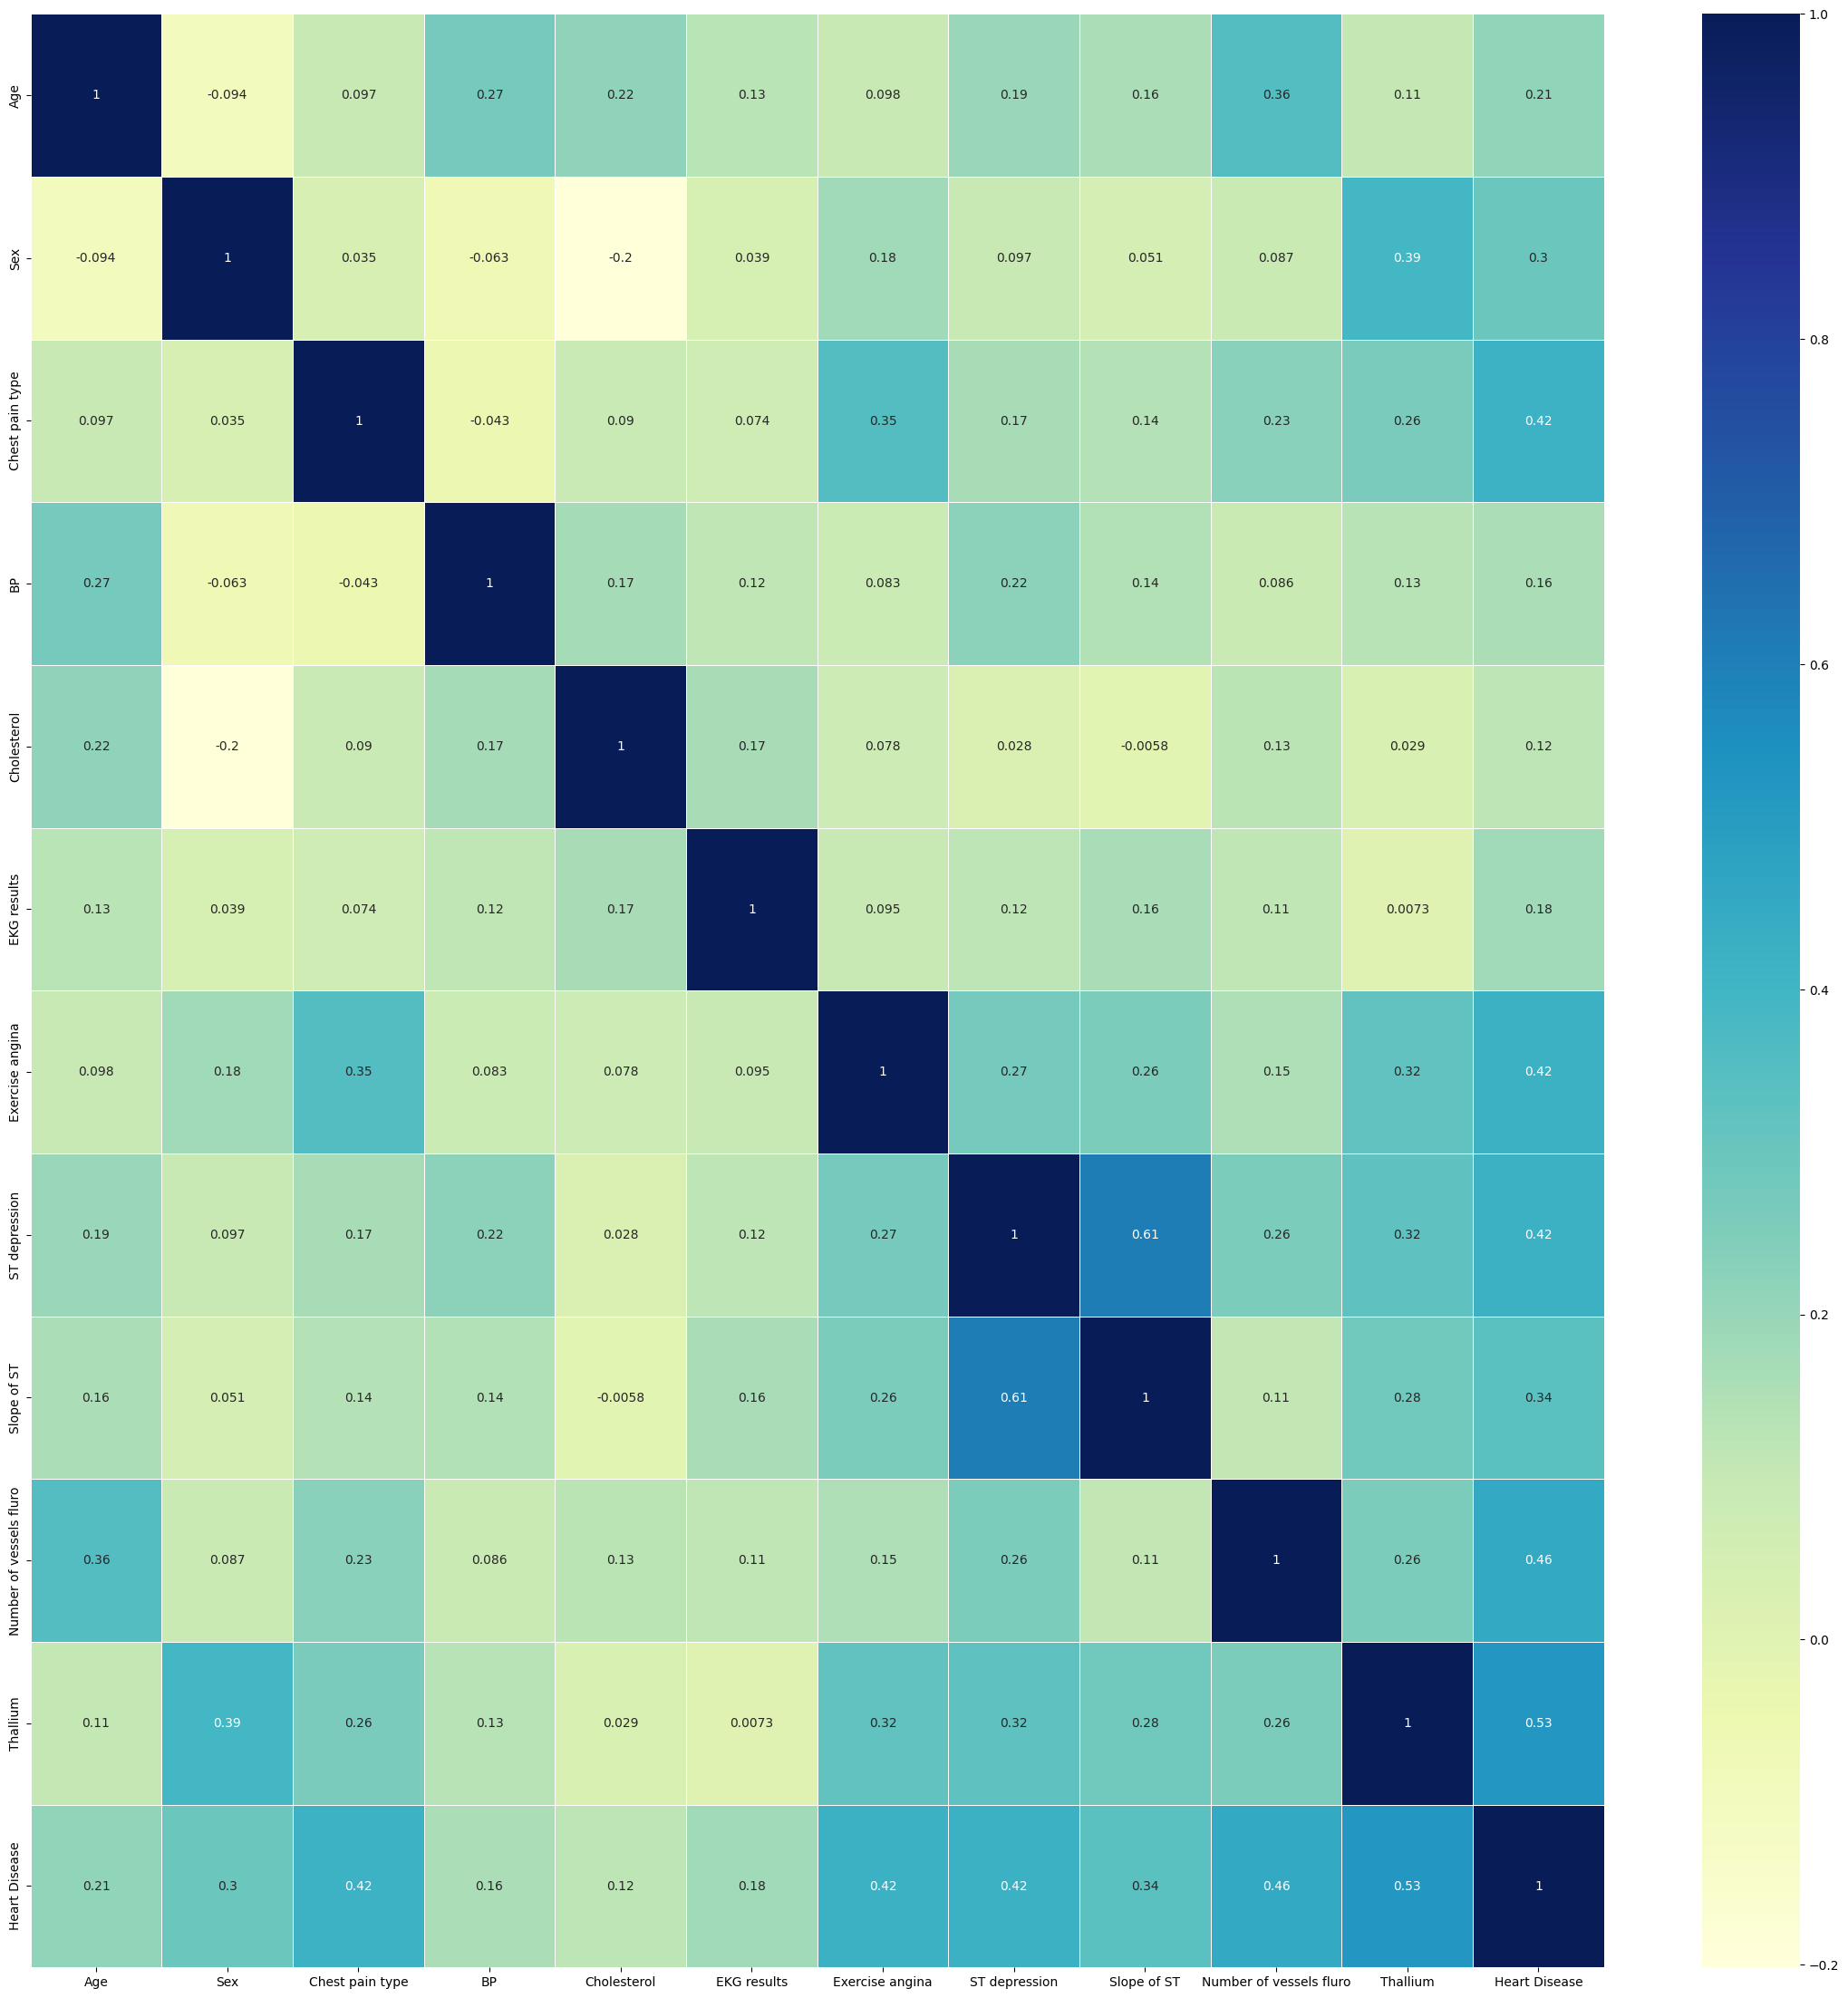

In [92]:
plt.figure(figsize=(28,28))
corr_matrix = sns.heatmap(dfheart.corr(), cmap="YlGnBu", annot=True, linewidth=.5)
corr_matrix

In [93]:
dfact = []
for i in selected_rows:
  dfact.append(i)
dfact.remove("Heart Disease")
dfact

['Age',
 'Sex',
 'Chest pain type',
 'BP',
 'Cholesterol',
 'EKG results',
 'Exercise angina',
 'ST depression',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium']

In [94]:
dataset = pd.DataFrame(df, columns = dfact)
dataset

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,2,0,2.4,2,3,3
1,67,0,3,115,564,2,0,1.6,2,0,7
2,57,1,2,124,261,0,0,0.3,1,0,7
3,64,1,4,128,263,0,1,0.2,2,1,7
4,74,0,2,120,269,2,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,0,0,0.5,1,0,7
266,44,1,2,120,263,0,0,0.0,1,0,7
267,56,0,2,140,294,2,0,1.3,2,0,3
268,57,1,4,140,192,0,0,0.4,2,0,6


In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
standard = StandardScaler()
df_required = pd.DataFrame(standard.fit_transform(dataset), columns = dfact)
df_required

,Age,Sex,Chest pain type,BP,Cholesterol,EKG results,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,1.712094,0.689500,0.870928,-0.075410,1.402212,0.981664,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,0.981664,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-1.026285,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-1.026285,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,0.981664,1.426081,-0.743600,-0.954234,0.349871,-0.875706
...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,0.689500,-0.183559,2.280369,-0.981951,-1.026285,-0.701222,-0.481153,-0.954234,-0.711535,1.189277
266,-1.147506,0.689500,-1.238045,-0.636310,0.258589,-1.026285,-0.701222,-0.918565,-0.954234,-0.711535,1.189277
267,0.172309,-1.450327,-1.238045,0.485490,0.859476,0.981664,-0.701222,0.218706,0.676419,-0.711535,-0.875706
268,0.282294,0.689500,0.870928,0.485490,-1.117635,-1.026285,-0.701222,-0.568636,0.676419,-0.711535,0.673032


In [96]:
from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KNeighborsClassifier
y_axis = df['Heart Disease']
x_axis = df_required
knn_scores = [[],[]]
for i in range(1,30):
  knn_class = KNeighborsClassifier(n_neighbors=i)
  val = cross_val_score(knn_class, x_axis, y_axis, cv=10)
  knn_scores[1].append(val.mean())
  knn_scores[0].append(i)

Text(0, 0.5, 'Accuracy percentage')

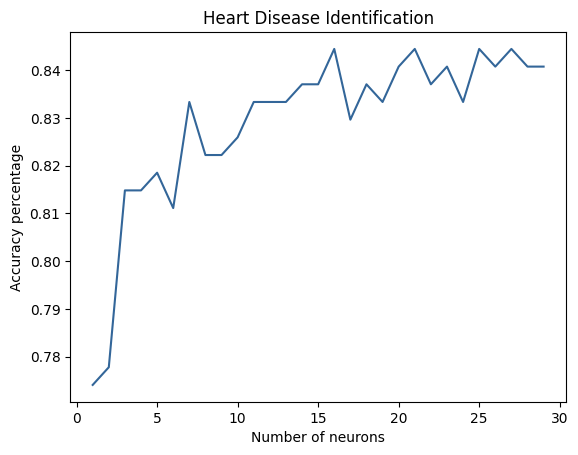

In [97]:
plt.plot(knn_scores[0], knn_scores[1], color=(0.2, 0.4, 0.6))
plt.title("Heart Disease Identification")
plt.xlabel("Number of neurons")
plt.ylabel("Accuracy percentage")